In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
path = '/content/AB_NYC_2019.csv'
df = pd.read_csv(path)
df_cleaned = df
df_cleaned

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22054,17744351,1 Bd furnished Bayridge Brooklyn NY,119029523,Ebada,Brooklyn,Fort Hamilton,40.62241,-74.02863,Entire home/apt,115.0,4.0,3.0,2019-05-19,0.48,3.0,295.0
22055,17746222,Perfect bedroom. Near Subways Columbia CityCol...,16721721,Federico,Manhattan,Harlem,40.81530,-73.95080,Private room,65.0,2.0,18.0,2018-11-04,0.64,1.0,0.0
22056,17748284,Guest BedRm in quaint NYC neighborhood. NEAR T...,25196982,Nikolas,Queens,Astoria,40.76924,-73.91702,Private room,65.0,1.0,11.0,2019-06-17,3.24,1.0,9.0
22057,17749273,1 br Woodside - close to LGA!,121096858,Caressa,Queens,Woodside,40.74176,-73.90631,Private room,35.0,1.0,0.0,NaN,NaN,1.0,0.0


In [ ]:
df.isnull().sum()

id                                   0
name                                15
host_id                              0
host_name                           14
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       3701
reviews_per_month                 3701
calculated_host_listings_count       1
availability_365                     1
dtype: int64

In [ ]:
#Handling missing datas
#1. find missing hostnames and fill with id
#2. first is to fill with zero
#3. check if the same host id has other property with reviews per month taken and fill with mean
#4.

In [18]:
df_new = df.drop(columns=['last_review'],axis=1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,0.10,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22054,17744351,1 Bd furnished Bayridge Brooklyn NY,119029523,Ebada,Brooklyn,Fort Hamilton,40.62241,-74.02863,Entire home/apt,115.0,4.0,3.0,0.48,3.0,295.0
22055,17746222,Perfect bedroom. Near Subways Columbia CityCol...,16721721,Federico,Manhattan,Harlem,40.81530,-73.95080,Private room,65.0,2.0,18.0,0.64,1.0,0.0
22056,17748284,Guest BedRm in quaint NYC neighborhood. NEAR T...,25196982,Nikolas,Queens,Astoria,40.76924,-73.91702,Private room,65.0,1.0,11.0,3.24,1.0,9.0
22057,17749273,1 br Woodside - close to LGA!,121096858,Caressa,Queens,Woodside,40.74176,-73.90631,Private room,35.0,1.0,0.0,NaN,1.0,0.0


In [ ]:
#1) Calculate How many properties in each neighbourhood group
properties = df_cleaned.groupby('neighbourhood_group').size()

properties

neighbourhood_group
Bronx              319
Brooklyn          9497
Manhattan        10204
Queens            1918
Staten Island      121
dtype: int64

In [ ]:
#2) Which Neighbour Hood Group Has highest prices use bar chart to show this for all neighbourhood groups
highest_prices = df_cleaned.groupby('neighbourhood_group')['price'].max()
highest_price_group = highest_prices.idxmax()


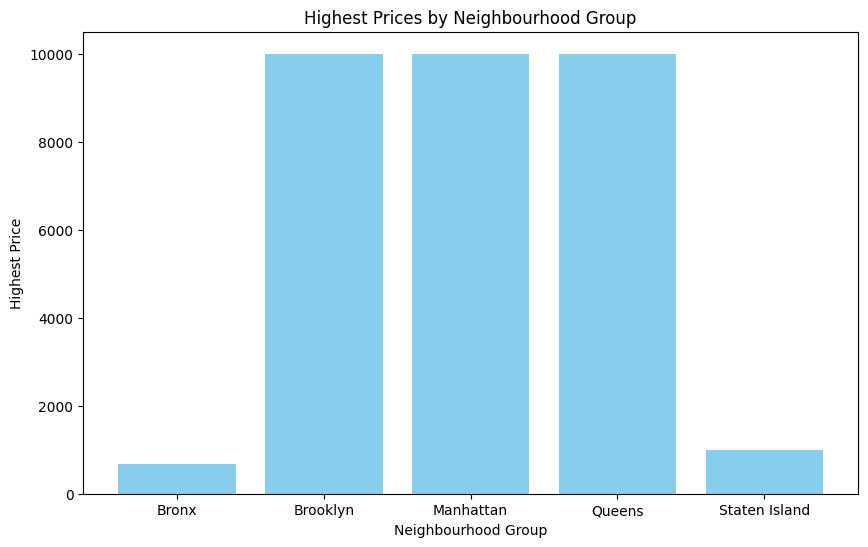

In [ ]:
#plotting Neighbourhood Group vs price
plt.figure(figsize=(10, 6))
plt.bar(highest_prices.index, highest_prices.values, color='skyblue')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Highest Price')
plt.title('Highest Prices by Neighbourhood Group')
plt.show()

In [ ]:
#2) Which Neighbour Hood Group Has lowest prices use bar chart to show this for all neighbourhood groups

lowest_prices = df_cleaned.groupby('neighbourhood_group')['price'].min()
lowest_prices

neighbourhood_group
Bronx            20.0
Brooklyn         11.0
Manhattan        10.0
Queens           20.0
Staten Island    20.0
Name: price, dtype: float64

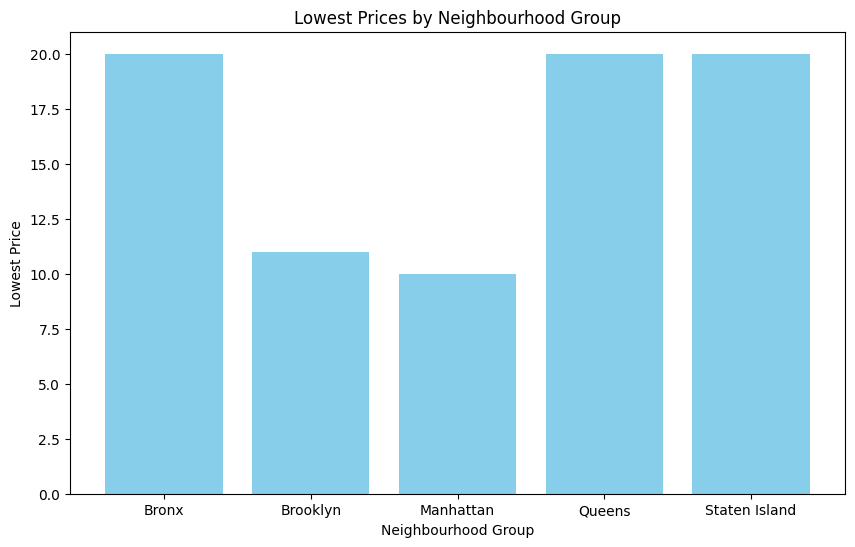

In [ ]:
#plotting Neighbourhood Group vs price
plt.figure(figsize=(10, 6))
plt.bar(lowest_prices.index, lowest_prices.values, color='skyblue')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Lowest Price')
plt.title('Lowest Prices by Neighbourhood Group')
plt.show()

In [ ]:
#4) Highest and lowest price airbnb in each Neighbour Hood Group
highest_prices = df_cleaned.groupby('neighbourhood_group')['price'].idxmax()
highest_price_listings = df_cleaned.loc[highest_prices, ['neighbourhood_group', 'name', 'price']]

lowest_prices = df_cleaned.groupby('neighbourhood_group')['price'].idxmin()
lowest_price_listings = df_cleaned.loc[lowest_prices, ['neighbourhood_group', 'name', 'price']]

print(highest_price_listings)
print(lowest_price_listings)

      neighbourhood_group                                             name  \
8521                Bronx                  1 Room in a 2 Bedroom Available   
17692            Brooklyn  Luxury 1 bedroom apt. -stunning Manhattan views   
6530            Manhattan                               Spanish Harlem Apt   
9151               Queens              Furnished room in Astoria apartment   
6333        Staten Island      Victorian with Stunning Views of NYC Harbor   

         price  
8521     680.0  
17692  10000.0  
6530    9999.0  
9151   10000.0  
6333    1000.0  
      neighbourhood_group                                            name  \
21733               Bronx  Partitioned (shared) Cozy Studio in Pelham Bay   
20992            Brooklyn         Spacious and Modern 2 Bedroom Apartment   
2860            Manhattan   Large furnished 2 bedrooms- - 30 days Minimum   
11866              Queens                Cozy studio just off Main Street   
957         Staten Island                 En

In [ ]:
#5) Which Host has highest count of properties

# Find the host with the highest count of properties
host_with_highest_count = df_cleaned['host_id'].value_counts().idxmax()

# Find the count of properties for the host with the highest count
highest_property_count = df_cleaned['host_id'].value_counts().max()

# Get the host's name
host_name_highest_count = df_cleaned[df_cleaned['host_id'] == host_with_highest_count]['host_name'].iloc[0]

host_name_highest_count

'Kara'

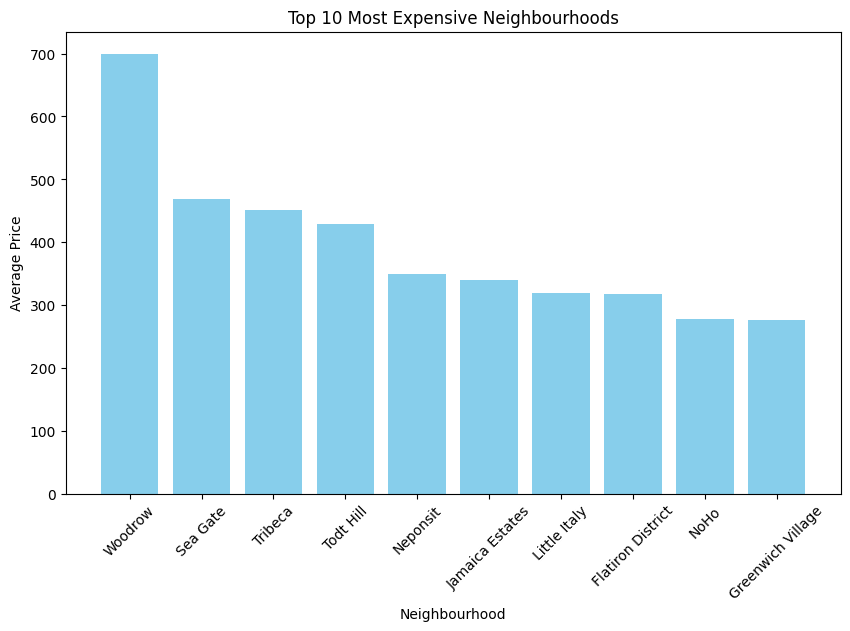

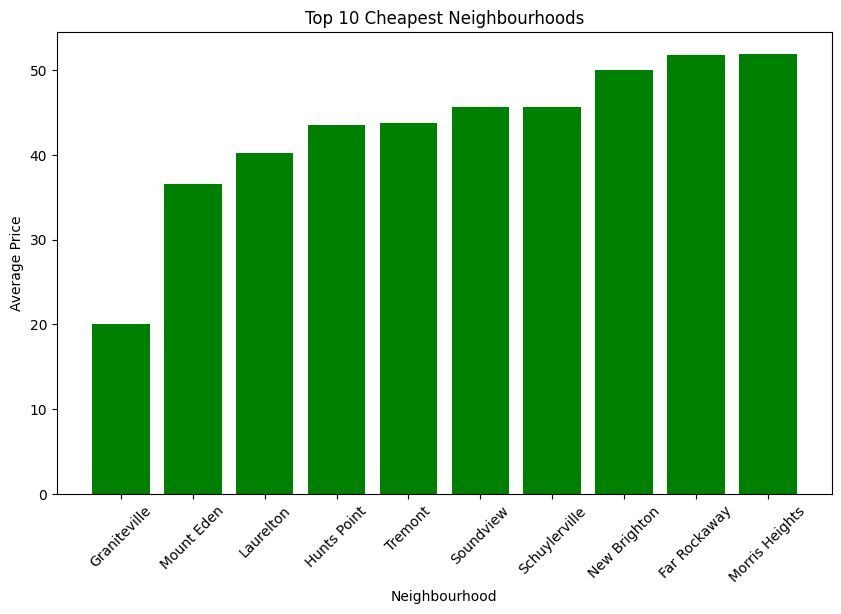

In [ ]:
#6) Which neighbourhood is most expensive and cheapest top 10 barchart

# Find the average price for each neighbourhood
neighborhood_avg_price = df_cleaned.groupby('neighbourhood')['price'].mean()

# Find the top 10 most expensive neighborhoods
top_10_expensive = neighborhood_avg_price.nlargest(10)

# Find the top 10 cheapest neighborhoods
top_10_cheapest = neighborhood_avg_price.nsmallest(10)

# Plotting the bar chart for most expensive neighborhoods
plt.figure(figsize=(10, 6))
plt.bar(top_10_expensive.index, top_10_expensive.values, color='skyblue')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Top 10 Most Expensive Neighbourhoods')
plt.xticks(rotation=45)
plt.show()

# Plotting the bar chart for cheapest neighborhoods
plt.figure(figsize=(10, 6))
plt.bar(top_10_cheapest.index, top_10_cheapest.values, color='green')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Top 10 Cheapest Neighbourhoods')
plt.xticks(rotation=45)
plt.show()

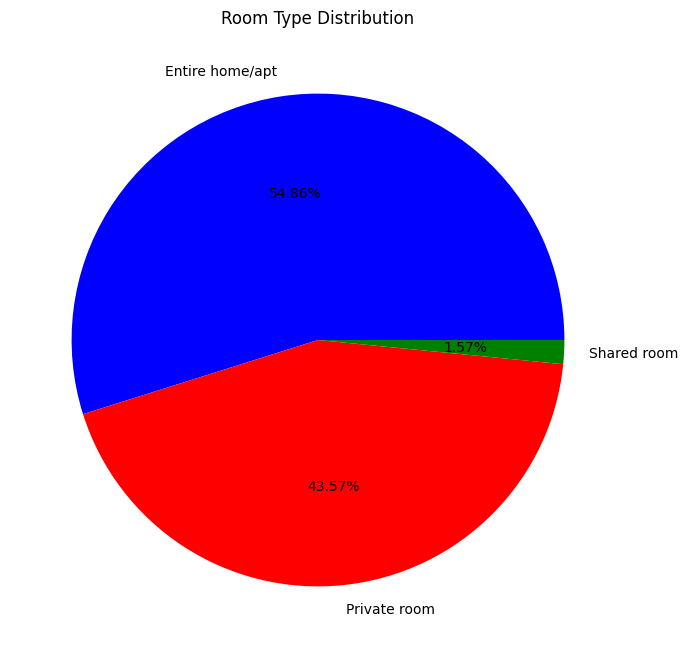

In [ ]:
#7) Count different type of room_type and do a pie chart showing % of each room type in overall dataset
# Count the different types of room_type
room_type_counts = df_cleaned['room_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.2f%%', colors=['blue', 'red', 'green'])
plt.title('Room Type Distribution')
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

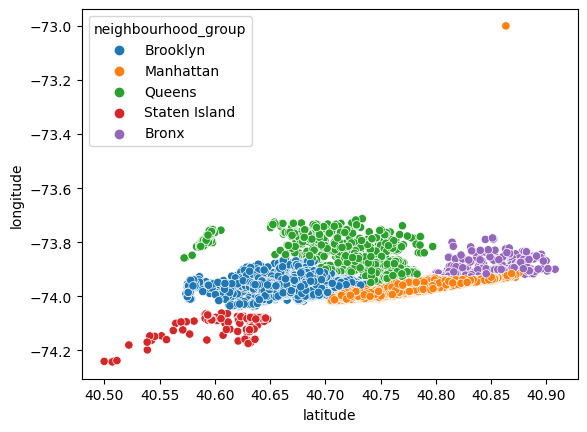

In [ ]:
#8) scatter plot between longitutude and latitude for different neighbourhood groups
import seaborn as sns

sns.scatterplot(data=df_cleaned,x='latitude',y='longitude',hue='neighbourhood_group')

<Axes: xlabel='latitude', ylabel='longitude'>

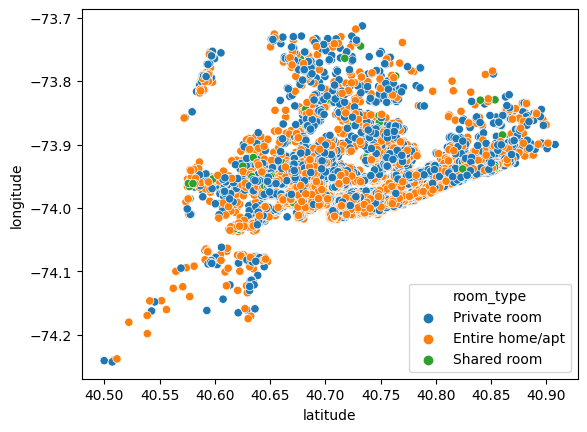

In [ ]:
#9) scatter plot between longitutude and latitude for different room_types
import seaborn as sns

sns.scatterplot(data=df_cleaned,x='latitude',y='longitude',hue='room_type')

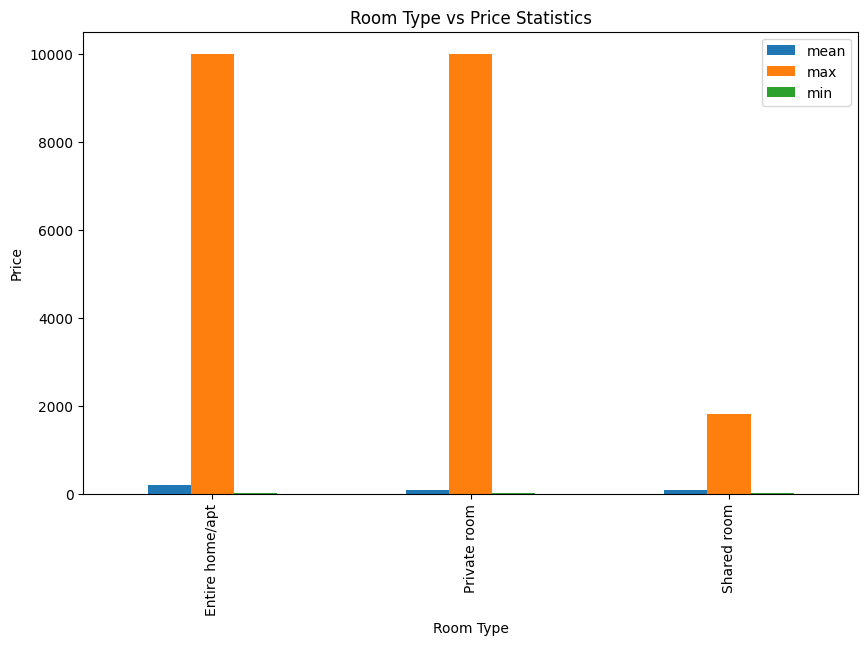

In [ ]:
#10) room_type vs price bar chart for the mean and highest and lowest

# Calculate mean, highest, and lowest prices for each room type
room_type_stats = df_cleaned.groupby('room_type')['price'].agg(['mean', 'max', 'min'])

# Plot the bar chart
room_type_stats.plot(kind='bar', figsize=(10, 6))

# Labeling and formatting
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Room Type vs Price Statistics')

# Show the plot
plt.show()

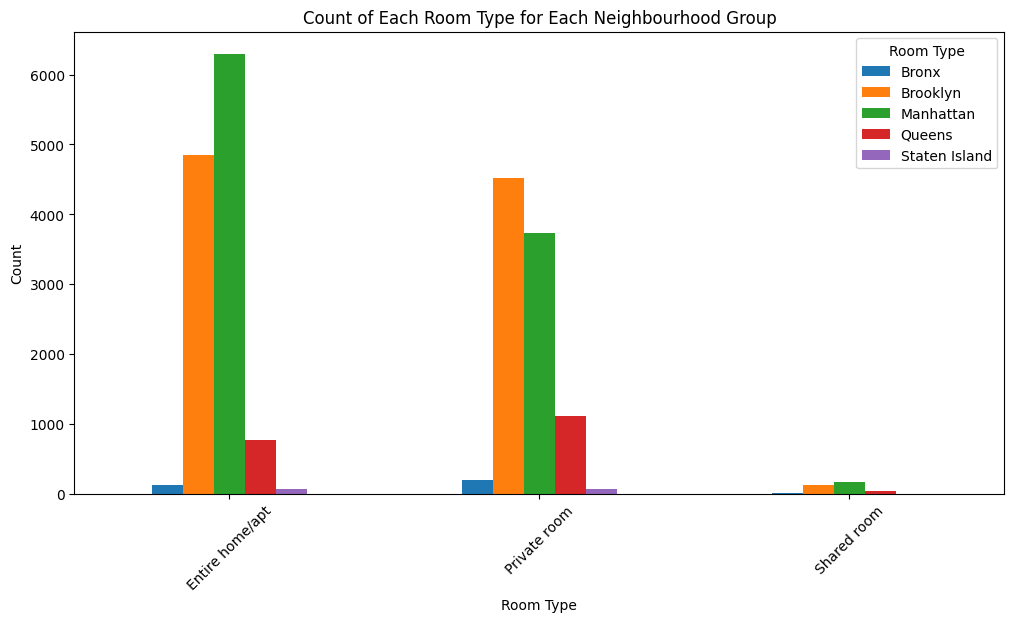

In [ ]:
#
# Create a pivot table to get the count of room types for each neighbourhood group
pivot_table = df_cleaned.groupby([ 'room_type','neighbourhood_group']).size().unstack(fill_value=0)

# Plot the count of each room type for each neighbourhood group
pivot_table.plot(kind='bar', figsize=(12, 6))

# Labeling and formatting
plt.title('Count of Each Room Type for Each Neighbourhood Group')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Room Type')

plt.show()